In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt

import math
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import torch
import torchvision
import torchvision
#from torchvision.transforms import v2
#import torch.utils.checkpoint as checkpoint

import warnings

seed = 1001
np.random.seed(seed)
torch.manual_seed(seed)
torch.set_default_dtype(torch.float32)
warnings.simplefilter('ignore', UserWarning)

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"
print(torch.cuda.device_count())
print([torch.cuda.get_device_name('cuda:'+str(i)) for i in range(torch.cuda.device_count())])

1
['NVIDIA GeForce GTX 1650']


In [3]:
data = torchvision.datasets.MNIST(root='./data', train=True, download=True)
data_tr, label_tr = data.train_data, data.train_labels
data = torchvision.datasets.MNIST(root='./data', train=False, download=True)
data_te, label_te = data.test_data, data.test_labels
print(data_tr.shape, data_te.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


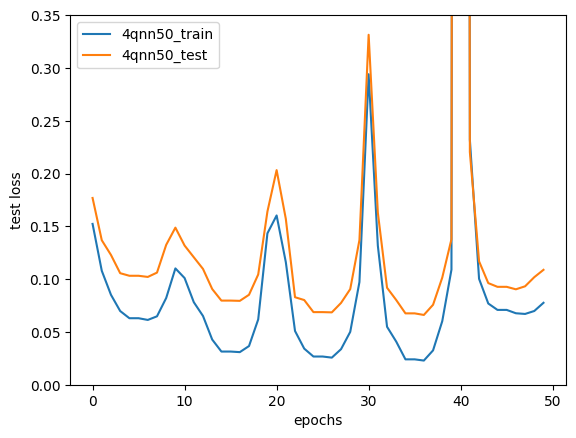

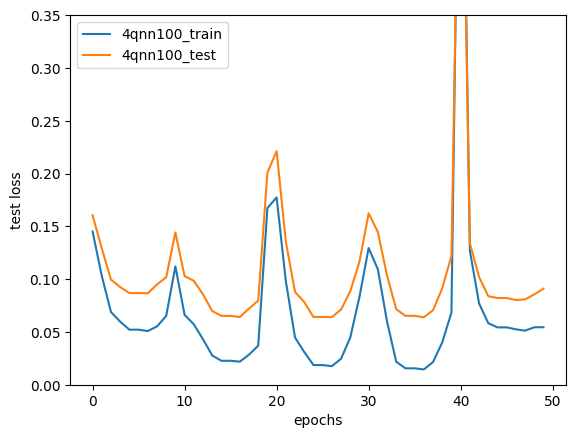

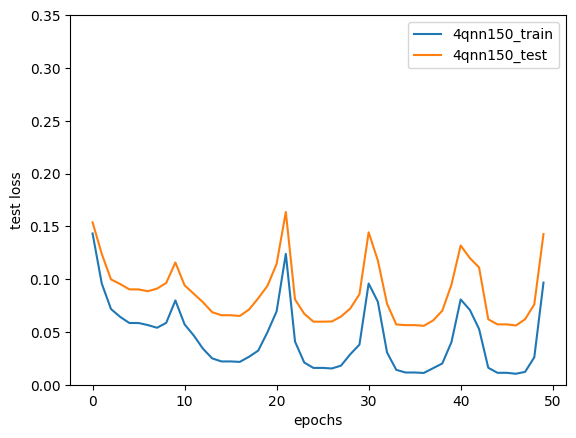

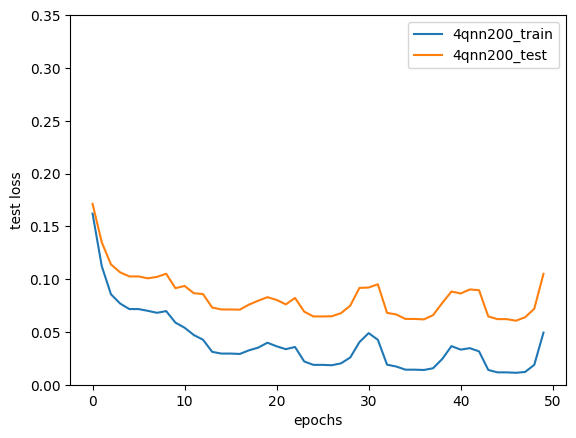

In [4]:
for n_qnn in [4]:
    for n_depth_per_block in [50,100,150,200]:
        fig, ax = plt.subplots()
        if n_depth_per_block==50:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'
        else:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'+str(n_depth_per_block)
        ##
        #if ((n_qnn==4 or n_qnn==9) and n_depth_per_block==50)or(n_qnn==4 and n_depth_per_block==100):
        #    prefix_name = ''
        #else:
        prefix_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_8qubits_ensembling_cos_"
        df_loss = pd.read_csv(dir_name+'/'+prefix_name+'loss_acc.csv')
        #sns.lineplot(x=df_loss['epochs'][1:],y=df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block))
        ax.plot(df_loss['epochs'][1:],df_loss['train_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block)+'_train')
        ax.plot(df_loss['epochs'][1:],df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block)+'_test')
        ax.set_xlabel('epochs')
        ax.set_ylabel('test loss')
        ax.set_ylim(ymax=0.35, ymin=0)
        ax.legend()
        fig_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_loss"
        plt.savefig('imgs_loss/'+fig_name+'.png', bbox_inches='tight')
        plt.show()

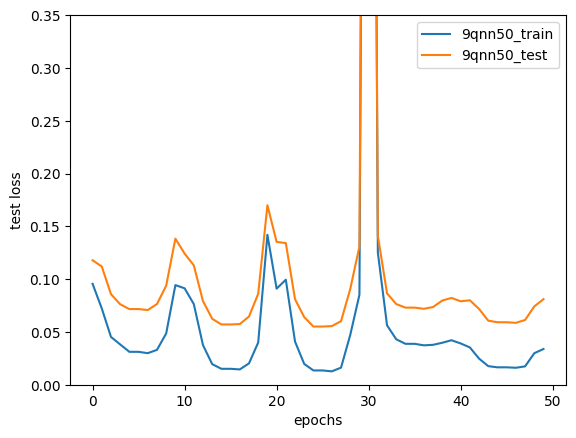

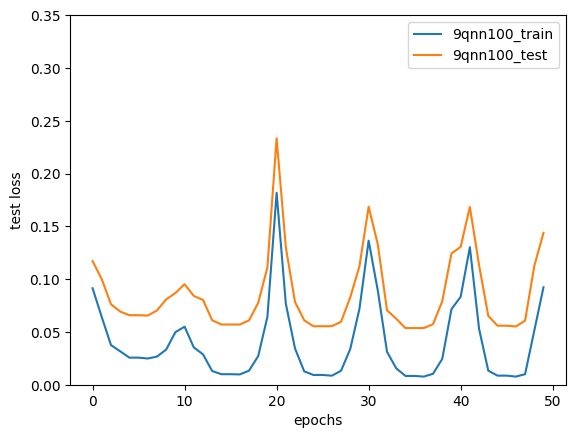

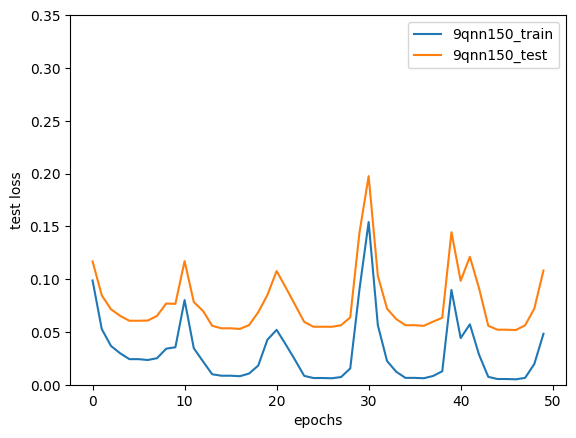

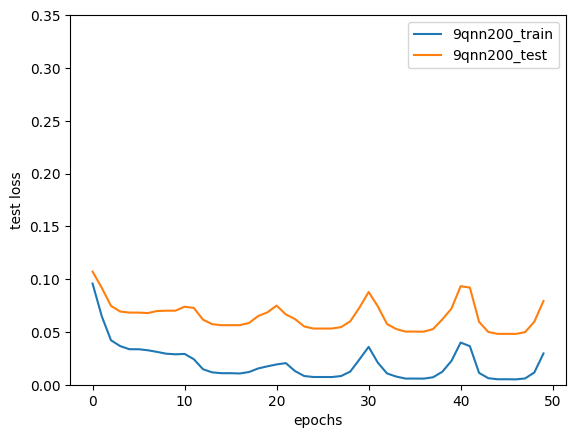

In [5]:
for n_qnn in [9]:
    for n_depth_per_block in [50,100,150,200]:
        fig, ax = plt.subplots()
        if n_depth_per_block==50:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'
        else:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'+str(n_depth_per_block)
        ##
        #if ((n_qnn==4 or n_qnn==9) and n_depth_per_block==50)or(n_qnn==4 and n_depth_per_block==100):
        #    prefix_name = ''
        #else:
        prefix_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_8qubits_ensembling_cos_"
        df_loss = pd.read_csv(dir_name+'/'+prefix_name+'loss_acc.csv')
        #sns.lineplot(x=df_loss['epochs'][1:],y=df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block))
        ax.plot(df_loss['epochs'][1:],df_loss['train_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block)+'_train')
        ax.plot(df_loss['epochs'][1:],df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block)+'_test')
        ax.set_xlabel('epochs')
        ax.set_ylabel('test loss')
        ax.set_ylim(ymax=0.35, ymin=0)
        ax.legend()
        fig_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_loss"
        plt.savefig('imgs_loss/'+fig_name+'.png', bbox_inches='tight')
        plt.show()

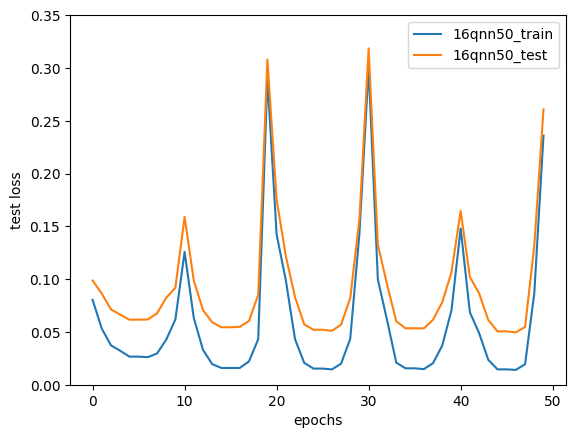

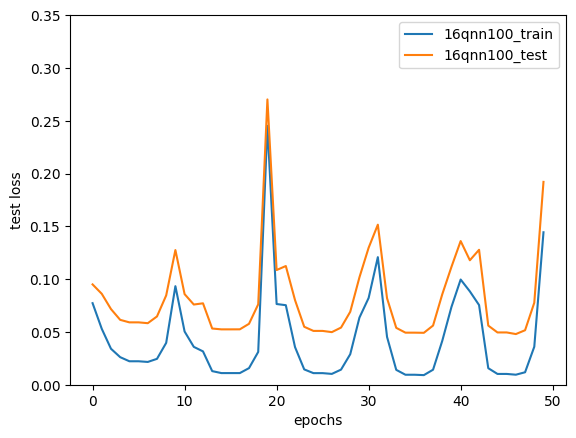

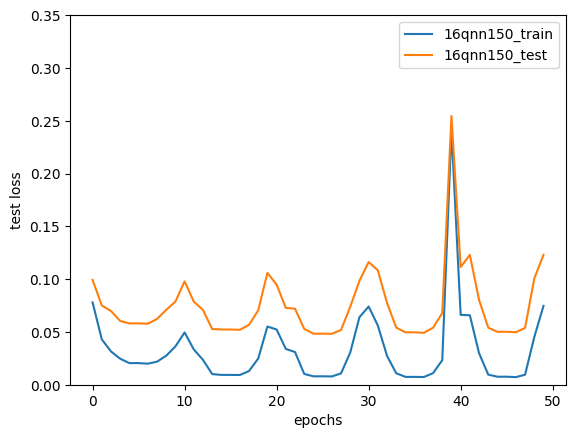

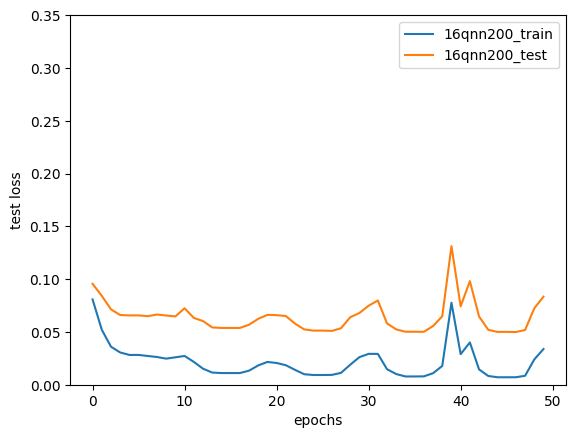

In [6]:
for n_qnn in [16]:
    for n_depth_per_block in [50,100,150,200]:
        fig, ax = plt.subplots()
        if n_depth_per_block==50:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'
        else:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'+str(n_depth_per_block)
        ##
        #if ((n_qnn==4 or n_qnn==9) and n_depth_per_block==50)or(n_qnn==4 and n_depth_per_block==100):
        #    prefix_name = ''
        #else:
        prefix_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_8qubits_ensembling_cos_"
        df_loss = pd.read_csv(dir_name+'/'+prefix_name+'loss_acc.csv')
        #sns.lineplot(x=df_loss['epochs'][1:],y=df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block))
        ax.plot(df_loss['epochs'][1:],df_loss['train_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block)+'_train')
        ax.plot(df_loss['epochs'][1:],df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block)+'_test')
        ax.set_xlabel('epochs')
        ax.set_ylabel('test loss')
        ax.set_ylim(ymax=0.35, ymin=0)
        ax.legend()
        fig_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_loss"
        plt.savefig('imgs_loss/'+fig_name+'.png', bbox_inches='tight')
        plt.show()

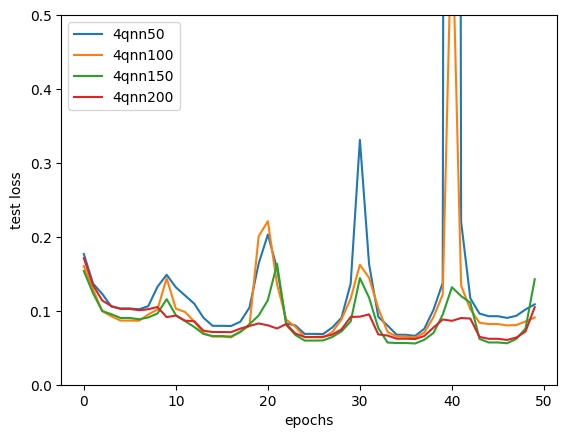

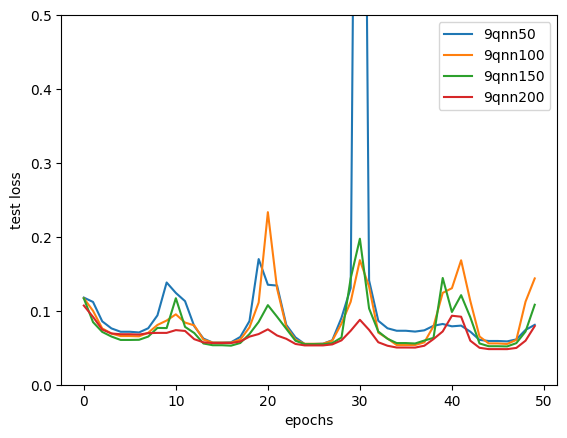

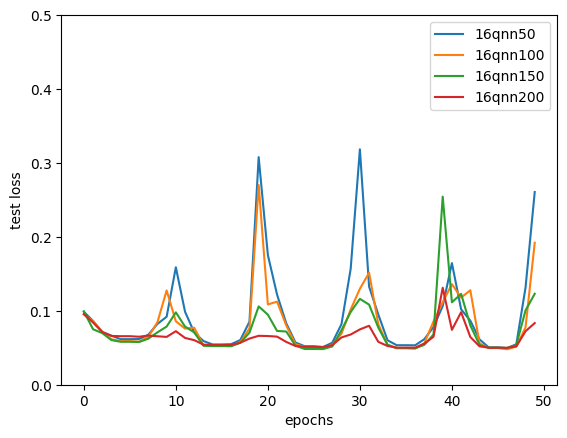

In [7]:
for n_qnn in [4,9,16]:
    fig, ax = plt.subplots()
    for n_depth_per_block in [50,100,150,200]:
        if n_depth_per_block==50:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'
        else:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'+str(n_depth_per_block)
        ##
        #if ((n_qnn==4 or n_qnn==9) and n_depth_per_block==50)or(n_qnn==4 and n_depth_per_block==100):
        #    prefix_name = ''
        #else:
        prefix_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_8qubits_ensembling_cos_"
        df_loss = pd.read_csv(dir_name+'/'+prefix_name+'loss_acc.csv')
        #sns.lineplot(x=df_loss['epochs'][1:],y=df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block))
        ax.plot(df_loss['epochs'][1:],df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block))
    ax.set_xlabel('epochs')
    ax.set_ylabel('test loss')
    ax.set_ylim(ymax=0.5, ymin=0)
    ax.legend()
    plt.show()

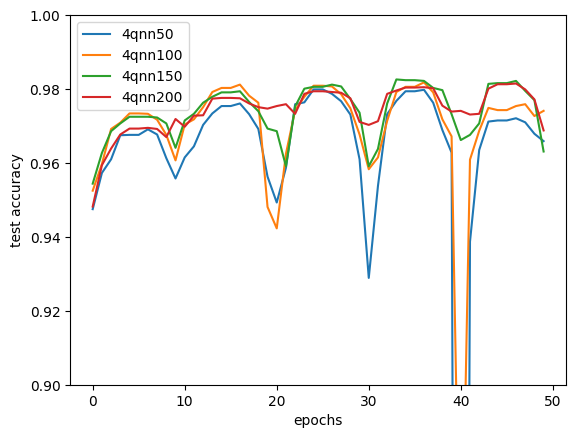

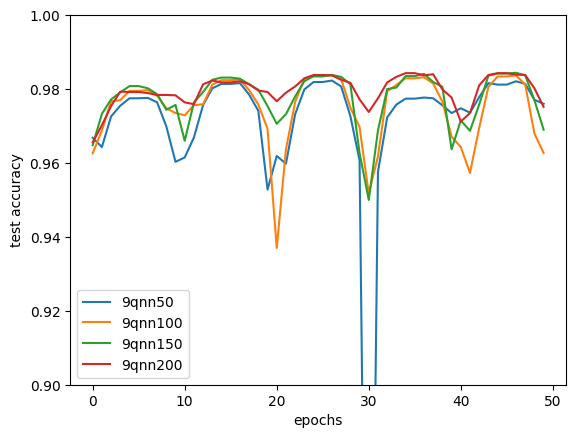

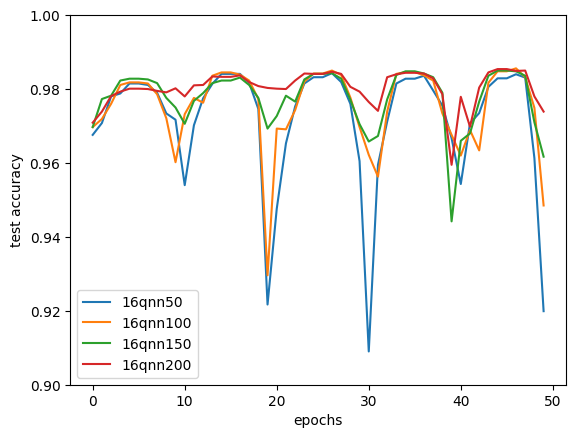

In [8]:
for n_qnn in [4,9,16]:
    fig, ax = plt.subplots()
    for n_depth_per_block in [50,100,150,200]:
        if n_depth_per_block==50:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'
        else:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'+str(n_depth_per_block)
        ##
        #if ((n_qnn==4 or n_qnn==9) and n_depth_per_block==50)or(n_qnn==4 and n_depth_per_block==100):
        #    prefix_name = ''
        #else:
        prefix_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_8qubits_ensembling_cos_"
        df_loss = pd.read_csv(dir_name+'/'+prefix_name+'loss_acc.csv')
        #sns.lineplot(x=df_loss['epochs'][1:],y=df_loss['test_loss'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block))
        ax.plot(df_loss['epochs'][1:],df_loss['test_acc'][1:],label=str(n_qnn)+'qnn'+str(n_depth_per_block))
    ax.set_xlabel('epochs')
    ax.set_ylabel('test accuracy')
    ax.set_ylim(ymax=1.0,ymin=0.9)
    ax.legend()
    plt.show()

In [9]:
for n_qnn in [4,9,16]:
    for n_depth_per_block in [50,100,150,200]:
        if n_depth_per_block==50:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'
        else:
            dir_name = 'baseline/tmp_8qubits_'+str(n_qnn)+'qnn'+str(n_depth_per_block)
        ##
        #if ((n_qnn==4 or n_qnn==9) and n_depth_per_block==50)or(n_qnn==4 and n_depth_per_block==100):
        #    prefix_name = ''
        #else:
        prefix_name = "mnist_"+str(n_qnn)+"qnn"+str(n_depth_per_block)+"_c100_8qubits_ensembling_cos_"
        df_loss = pd.read_csv(dir_name+'/'+prefix_name+'loss_acc.csv')
        min_index = df_loss['train_loss'].argmin()
        #min_index = df_loss['test_acc'].argmax()
        print(str(n_qnn)+"qnn"+str(n_depth_per_block)+",", f"{df_loss['epochs'][min_index]}th epoch,", 
              f"train loss {df_loss['train_loss'][min_index]:.6f}", f"train acc {df_loss['train_acc'][min_index]:.6f}",
              f"test loss {df_loss['test_loss'][min_index]:.6f}", f"test acc {df_loss['test_acc'][min_index]:.6f}")

4qnn50, 36th epoch, train loss 0.022878 train acc 0.994267 test loss 0.066075 test acc 0.979800
4qnn100, 36th epoch, train loss 0.014436 train acc 0.996583 test loss 0.063848 test acc 0.981800
4qnn150, 46th epoch, train loss 0.010396 train acc 0.997967 test loss 0.056083 test acc 0.982200
4qnn200, 46th epoch, train loss 0.011307 train acc 0.998200 test loss 0.060616 test acc 0.981500
9qnn50, 26th epoch, train loss 0.012646 train acc 0.998017 test loss 0.055520 test acc 0.982300
9qnn100, 36th epoch, train loss 0.007693 train acc 0.998667 test loss 0.053698 test acc 0.983200
9qnn150, 46th epoch, train loss 0.005108 train acc 0.999400 test loss 0.051799 test acc 0.984400
9qnn200, 46th epoch, train loss 0.005077 train acc 0.999667 test loss 0.048134 test acc 0.983900
16qnn50, 46th epoch, train loss 0.014042 train acc 0.998167 test loss 0.049571 test acc 0.984000
16qnn100, 36th epoch, train loss 0.009095 train acc 0.998967 test loss 0.049161 test acc 0.983700
16qnn150, 46th epoch, train los